In this notebook we aim to predict the origin farm of a wine based on various characteristics and features of the wine.
The steps we take include exploring the dataset, adjusting the values to be used for modeling and in the end training and testing, using the K-Nearest Neighbors (KNN) model to try to predict the origin farm.

In [3]:
# Importing all relevant packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Load the dataset
wine_df = pd.read_csv('wine.csv')

# Display basic information about the dataset
wine_df.info(), wine_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Wine                  178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic.acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Acl                   178 non-null    float64
 5   Mg                    178 non-null    int64  
 6   Phenols               178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid.phenols  178 non-null    float64
 9   Proanth               178 non-null    float64
 10  Color.int             178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD                    178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


(None,
    Wine  Alcohol  Malic.acid   Ash   Acl   Mg  Phenols  Flavanoids  \
 0     1    14.23        1.71  2.43  15.6  127     2.80        3.06   
 1     1    13.20        1.78  2.14  11.2  100     2.65        2.76   
 2     1    13.16        2.36  2.67  18.6  101     2.80        3.24   
 3     1    14.37        1.95  2.50  16.8  113     3.85        3.49   
 4     1    13.24        2.59  2.87  21.0  118     2.80        2.69   
 
    Nonflavanoid.phenols  Proanth  Color.int   Hue    OD  Proline  
 0                  0.28     2.29       5.64  1.04  3.92     1065  
 1                  0.26     1.28       4.38  1.05  3.40     1050  
 2                  0.30     2.81       5.68  1.03  3.17     1185  
 3                  0.24     2.18       7.80  0.86  3.45     1480  
 4                  0.39     1.82       4.32  1.04  2.93      735  )

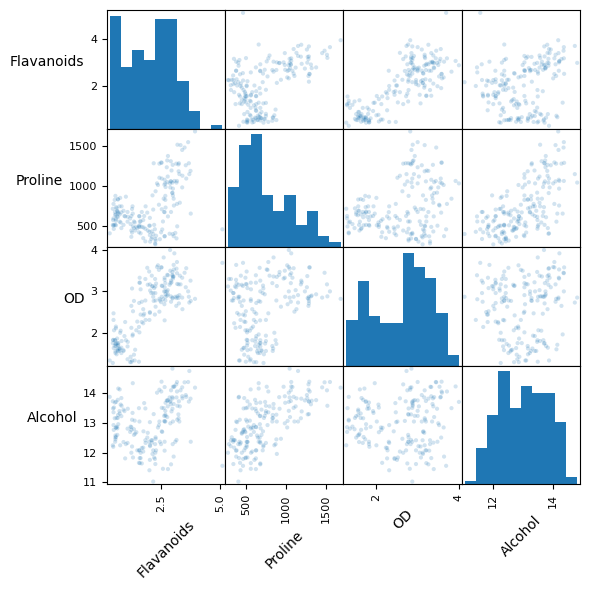

In [17]:
from pandas.plotting import scatter_matrix

# Select the specified columns for the scatter matrix
selDF = wine_df[['Flavanoids', 'Proline', 'OD', 'Alcohol']]

# Plot the scatter matrix for these selected features
fig = scatter_matrix(selDF, alpha=0.2, figsize=(6, 6), diagonal="hist")

# Rotate labels for better readability using pyplot
for ax in fig.flatten():
    ax.xaxis.label.set_rotation(45)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha("right")

# Adjust layout and show the plot using pyplot
plt.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

In [6]:
cntWine = wine_df["Wine"].value_counts()
propWine = wine_df["Wine"].value_counts(normalize=True)
cntWine

Wine
2    71
1    59
3    48
Name: count, dtype: int64

In [7]:
propWine

Wine
2    0.398876
1    0.331461
3    0.269663
Name: proportion, dtype: float64

In [8]:
catType = pd.CategoricalDtype(categories=[1, 2, 3], ordered=False)
wine_df["Wine"] = wine_df["Wine"].astype(catType)
wine_df["Wine"]

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: Wine, Length: 178, dtype: category
Categories (3, int64): [1, 2, 3]

In [9]:
wine_df[['Flavanoids', 'Proline', 'OD', 'Alcohol']].describe()

,Flavanoids,Proline,OD,Alcohol
count,178.000000,178.000000,178.000000,178.000000
mean,2.029270,746.893258,2.611685,13.000618
std,0.998859,314.907474,0.709990,0.811827
min,0.340000,278.000000,1.270000,11.030000
25%,1.205000,500.500000,1.937500,12.362500
50%,2.135000,673.500000,2.780000,13.050000
75%,2.875000,985.000000,3.170000,13.677500
max,5.080000,1680.000000,4.000000,14.830000


In [10]:
def normalize(x):
    return (x - min(x)) / (
        max(x) - min(x)
    )  # distance of item value - minimum vector value divided by the range of all vector values


testSet1 = np.arange(1, 6)
testSet2 = np.arange(1, 6) * 10


print(f"Normalized testSet1: {normalize(testSet1)}\n")

Normalized testSet1: [0.   0.25 0.5  0.75 1.  ]



In [11]:
excluded = ["Wine"]  # list of columns to exclude
# X = cleanDF.loc[:, ~cleanDF.columns.isin(excluded)]
X = wine_df.drop(excluded, axis=1)
X = X.apply(normalize, axis=0)
X[['Flavanoids', 'Proline', 'OD', 'Alcohol']].describe()

,Flavanoids,Proline,OD,Alcohol
count,178.000000,178.000000,178.000000,178.000000
mean,0.356386,0.334446,0.491460,0.518584
std,0.210730,0.224613,0.260070,0.213639
min,0.000000,0.000000,0.000000,0.000000
25%,0.182489,0.158702,0.244505,0.350658
50%,0.378692,0.282097,0.553114,0.531579
75%,0.534810,0.504280,0.695971,0.696711
max,1.000000,1.000000,1.000000,1.000000


In [12]:
y = wine_df["Wine"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [13]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train.iloc[:,:15], y_train)
# # make predictions on the test set

KNeighborsClassifier()

In [14]:
y_pred = knn.predict((X_test.iloc[:,:15]))

In [15]:
cm = confusion_matrix(y_test, y_pred, labels=knn.classes_)
cm

array([[19,  0,  0],
       [ 1, 18,  2],
       [ 0,  0, 14]], dtype=int64)

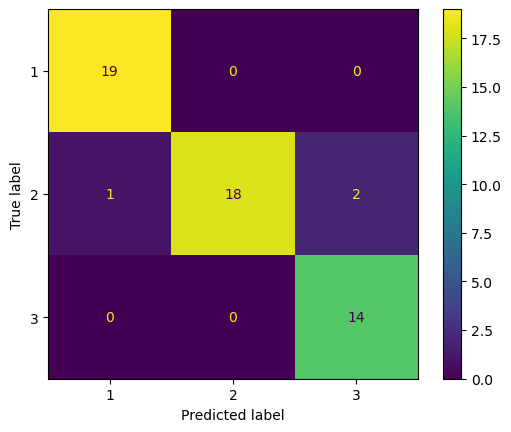

In [16]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()